In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()


# Load dataset
titanic_file = "titanichw4.csv"
df = pd.read_csv(titanic_file)





Saving titanichw4.csv to titanichw4.csv


In [ ]:

# 2. Describe Variables
print("\n===== Data Types of Each Column =====")
print(df.dtypes.to_string())

# Define types: Continuous, Discrete, Ordinal, Nominal
variable_types = {
    "Survived": "Nominal",
    "Pclass": "Ordinal",
    "Name": "Nominal",
    "Sex": "Nominal",
    "Age": "Continuous",
    "SibSp": "Discrete",
    "Parch": "Discrete",
    "Ticket": "Nominal",
    "Fare": "Continuous",
    "Cabin": "Nominal",
    "Embarked": "Nominal"
}

print("\n===== Classification of Variables =====")
for var, var_type in variable_types.items():
    print(f"{var:<10}: {var_type}")




===== Data Types of Each Column =====
PassengerId      int64
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object

===== Classification of Variables =====
Survived  : Nominal
Pclass    : Ordinal
Name      : Nominal
Sex       : Nominal
Age       : Continuous
SibSp     : Discrete
Parch     : Discrete
Ticket    : Nominal
Fare      : Continuous
Cabin     : Nominal
Embarked  : Nominal


'\n# 2. Describe variables\ndtype_info = titanic.dtypes\n\n# Define types: Continuous, Discrete, Ordinal, Nominal\nvariable_types = {\n    "Survived": "Nominal",\n    "Pclass": "Ordinal",\n    "Name": "Nominal",\n    "Sex": "Nominal",\n    "Age": "Continuous",\n    "SibSp": "Discrete",\n    "Parch": "Discrete",\n    "Ticket": "Nominal",\n    "Fare": "Continuous",\n    "Cabin": "Nominal",\n    "Embarked": "Nominal"\n}\n\n'

In [ ]:
# 3. Data Point and Unit of Analysis
unit_of_analysis = "Each row represents a single passenger on the Titanic."
data_points_collected = len(df)
total_possible_data_points = 2224
percentage_captured = (data_points_collected / total_possible_data_points) * 100
features_per_point = len(df.columns)

print("\n===== Unit of Analysis =====")
print(unit_of_analysis)
print(f"Total Data Points Captured: {data_points_collected} ({percentage_captured:.2f}% of total)")
print(f"Number of Features per Data Point: {features_per_point}")


===== Unit of Analysis =====
Each row represents a single passenger on the Titanic.
Total Data Points Captured: 891 (40.06% of total)
Number of Features per Data Point: 12


In [ ]:
# 4. Create Categorical Variables
print("\n===== Creating Categorical Variables =====")

df["Survived_cat"] = df["Survived"].astype("category").cat.codes
df["Pclass_cat"] = pd.factorize(df["Pclass"])[0]
df["Sex_cat"] = pd.Categorical(df["Sex"])

print("Converted Survived and Pclass into categorical codes using cat.codes and factorize().")
print("Converted Sex into a categorical type using Categorical().")

print("\n===== Data Types After Transformation =====")
print(df[["Survived", "Survived_cat", "Pclass", "Pclass_cat", "Sex", "Sex_cat"]].dtypes)


# Explanation
print("\n===== Explanation of Categorical Variables =====")
print("A categorical variable is a variable that can take on a limited number of distinct values, often representing categories or labels rather than continuous numbers.")
print("In Pandas, categorical variables are stored as 'category' dtype, which allows for more efficient storage and operations compared to storing them as strings.")
print("cat.codes assigns a numeric code to each category, factorize() provides similar functionality but returns a tuple, and Categorical() explicitly converts a column to categorical format.")
print("Transforming categorical variables into numerical representations is important for machine learning models, as many algorithms do not support non-numeric data.")



===== Creating Categorical Variables =====
Converted Survived and Pclass into categorical codes using cat.codes and factorize().
Converted Sex into a categorical type using Categorical().

===== Data Types After Transformation =====
Survived          object
Survived_cat        int8
Pclass            object
Pclass_cat         int64
Sex               object
Sex_cat         category
dtype: object

===== Explanation of Categorical Variables =====
A categorical variable is a variable that can take on a limited number of distinct values, often representing categories or labels rather than continuous numbers.
In Pandas, categorical variables are stored as 'category' dtype, which allows for more efficient storage and operations compared to storing them as strings.
cat.codes assigns a numeric code to each category, factorize() provides similar functionality but returns a tuple, and Categorical() explicitly converts a column to categorical format.
Transforming categorical variables into numeric

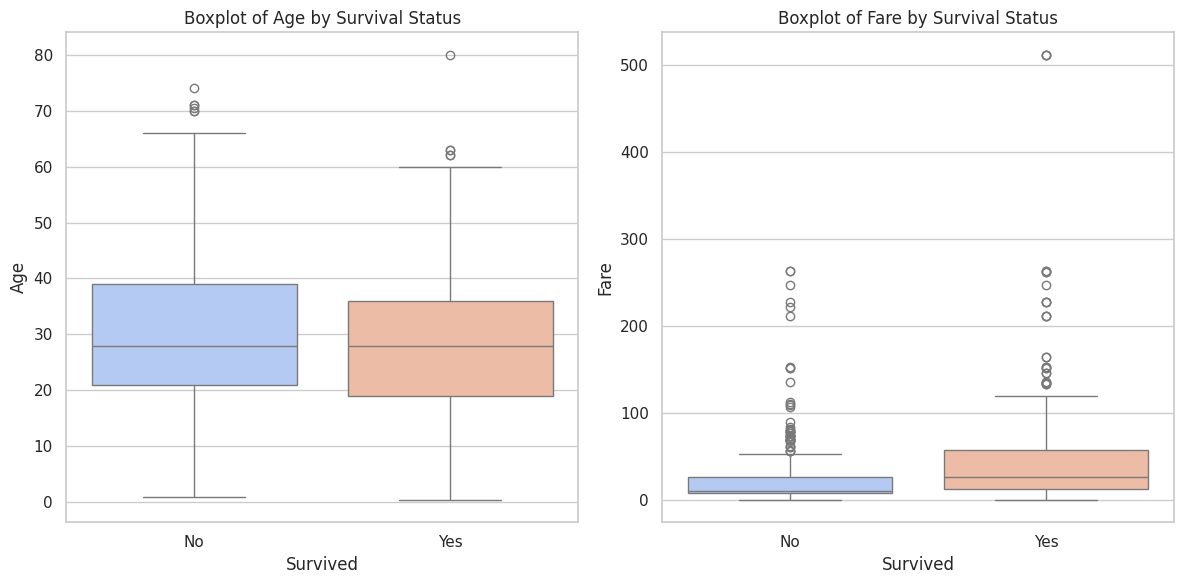

'\n# 5. Boxplots\ndef plot_boxplots():\n    plt.figure(figsize=(12, 5))\n    plt.subplot(1, 2, 1)\n    sns.boxplot(x=\'Survived\', y=\'Age\', data=titanic)\n    plt.title("Age vs Survived")\n    \n    plt.subplot(1, 2, 2)\n    sns.boxplot(x=\'Survived\', y=\'Fare\', data=titanic)\n    plt.title("Fare vs Survived")\n    \n    plt.show()\nplot_boxplots()\n\n'

In [ ]:


# 5. Boxplots of Age and Fare grouped by Survived
sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x="Survived", y="Age", data=df, ax=axes[0], palette="coolwarm")
axes[0].set_title("Boxplot of Age by Survival Status")

sns.boxplot(x="Survived", y="Fare", data=df, ax=axes[1], palette="coolwarm")
axes[1].set_title("Boxplot of Fare by Survival Status")

plt.tight_layout()
plt.show()



===== Descriptive Statistics for Age of Survivors =====
Mean Age: 28.34
Median Age: 28.00
Max Age: 80.0
Min Age: 0.42
Standard Deviation: 14.95
Quartiles:
0.25    19.0
0.50    28.0
0.75    36.0
Name: Age, dtype: float64


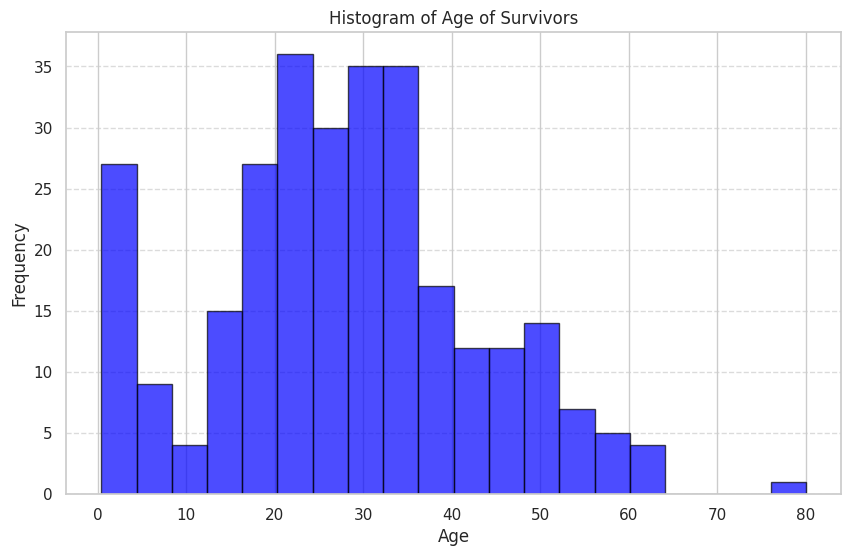


===== Distribution Description =====
- The distribution of survivor ages appears to be right-skewed, meaning there are more younger survivors with a few older ones.
- Missing values were removed before calculating statistics.
- Potential outliers exist at the upper end of the age range, especially for older passengers.
- The data appears to be unimodal with a central peak around the younger age range.
- The central tendency is around the mean (~28.34) and median (~28.00).
- The spread is measured by the standard deviation (~14.95) and quartiles:
  - 25th percentile (Q1): 19.00
  - 50th percentile (Q2 - Median): 28.00
  - 75th percentile (Q3): 36.00
- The data is spread out, with most passengers falling within the first and third quartiles.


'\n# 6. Descriptive Statistics\nsurvived_ages = titanic[titanic[\'Survived\'] == \'Yes\'][\'Age\'].dropna()\n\nplt.hist(survived_ages, bins=20, edgecolor=\'black\')\nplt.title("Histogram of Age of Survivors")\nplt.xlabel("Age")\nplt.ylabel("Frequency")\nplt.show()\n\nprint(survived_ages.describe())\n'

In [ ]:
# 6. Descriptive Statistics
print("\n===== Descriptive Statistics for Age of Survivors =====")

# Filter data for passengers who survived and drop missing age values
survivors_age = df[df['Survived'] == 'Yes']['Age'].dropna()

# Calculate summary statistics
mean_age = survivors_age.mean()
median_age = survivors_age.median()
max_age = survivors_age.max()
min_age = survivors_age.min()
std_dev = survivors_age.std()
quartiles = survivors_age.quantile([0.25, 0.5, 0.75])

# Print summary statistics
print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")
print(f"Max Age: {max_age}")
print(f"Min Age: {min_age}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Quartiles:\n{quartiles}")

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(survivors_age, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age of Survivors")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Describe distribution
print("\n===== Distribution Description =====")
print("- The distribution of survivor ages appears to be right-skewed, meaning there are more younger survivors with a few older ones.")
print("- Missing values were removed before calculating statistics.")
print("- Potential outliers exist at the upper end of the age range, especially for older passengers.")
print("- The data appears to be unimodal with a central peak around the younger age range.")
print(f"- The central tendency is around the mean (~{mean_age:.2f}) and median (~{median_age:.2f}).")
print(f"- The spread is measured by the standard deviation (~{std_dev:.2f}) and quartiles:")
print(f"  - 25th percentile (Q1): {quartiles[0.25]:.2f}")
print(f"  - 50th percentile (Q2 - Median): {quartiles[0.5]:.2f}")
print(f"  - 75th percentile (Q3): {quartiles[0.75]:.2f}")
print("- The data is spread out, with most passengers falling within the first and third quartiles.")



===== Replotting Boxplots After Removing Missing Age =====


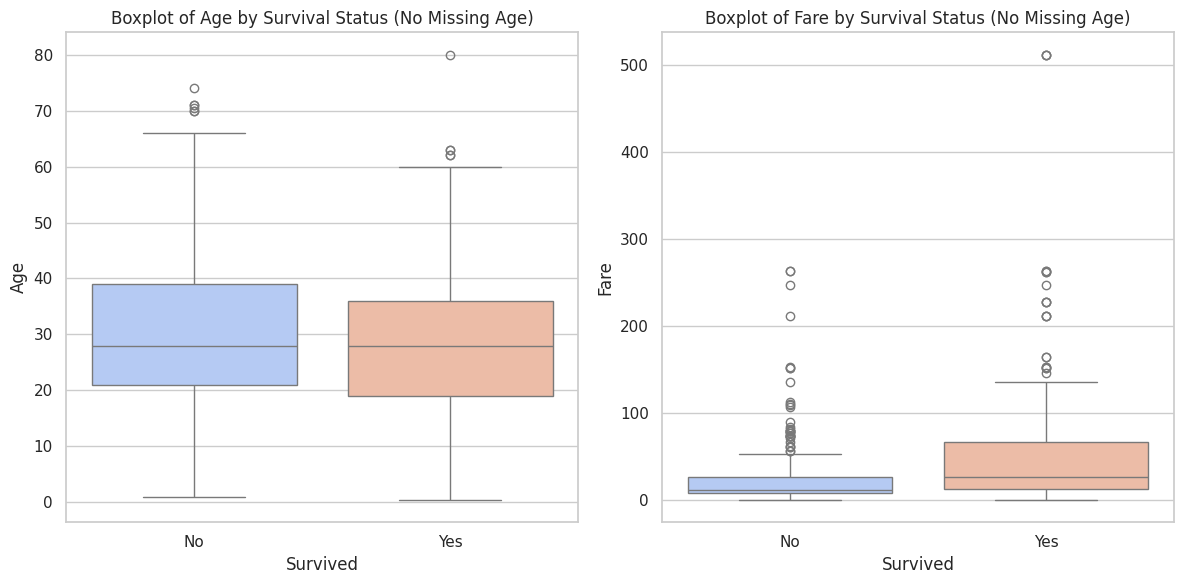


===== Description of Boxplots After Removing Missing Age =====
- The boxplots for Age and Fare show how the distribution changes after removing passengers with missing age data.
- The distribution of Age remains mostly similar to the original, with some data points removed.
- Fare distribution might also show slight changes, particularly in the outliers.

===== Replotting Boxplots After Replacing Missing Age with -99 =====


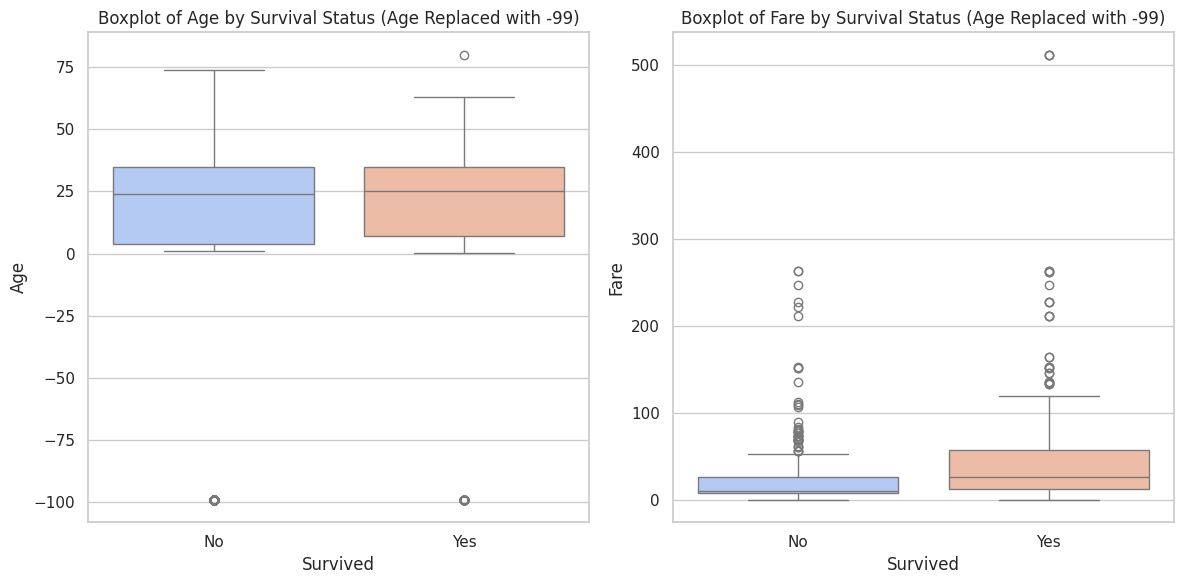


===== Description of Boxplots After Replacing Missing Age with -99 =====
- The boxplot for Age now shows a significant outlier at -99, as that value is used for missing data.
- The Fare boxplot is unaffected by the replacement of missing Age values.

===== Removing Outliers and Replotting Histogram =====


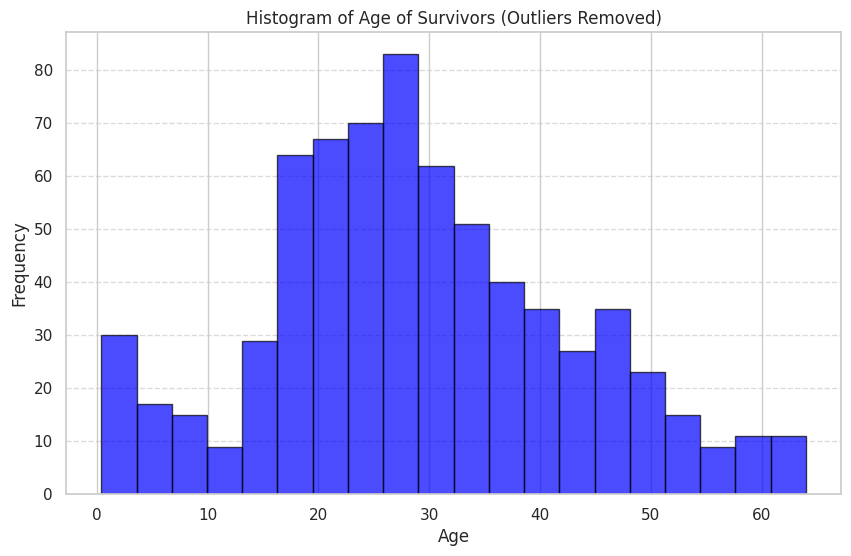


===== Summary Statistics After Removing Outliers =====
Mean Age (No Outliers): 29.07
Median Age (No Outliers): 28.00
Standard Deviation (No Outliers): 13.73
Quartiles (No Outliers):
0.25    20.0
0.50    28.0
0.75    38.0
Name: Age, dtype: float64

===== Description of Histogram After Removing Outliers =====
- The histogram shows a more concentrated distribution of ages after removing the outliers.
- The right-skewed nature is less pronounced, and the peak of the distribution is more centered.


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# 7. Missing Values: Restoring and Modifying the Data
print("\n===== Replotting Boxplots After Removing Missing Age =====")

# remove rows with missing Age
df_no_age_missing = df.dropna(subset=['Age'])

# Replot boxplots for Age and Fare by Survival Status
sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x="Survived", y="Age", data=df_no_age_missing, ax=axes[0], palette="coolwarm")
axes[0].set_title("Boxplot of Age by Survival Status (No Missing Age)")

sns.boxplot(x="Survived", y="Fare", data=df_no_age_missing, ax=axes[1], palette="coolwarm")
axes[1].set_title("Boxplot of Fare by Survival Status (No Missing Age)")

plt.tight_layout()
plt.show()

print("\n===== Description of Boxplots After Removing Missing Age =====")
print("- The boxplots for Age and Fare show how the distribution changes after removing passengers with missing age data.")
print("- The distribution of Age remains mostly similar to the original, with some data points removed.")
print("- Fare distribution might also show slight changes, particularly in the outliers.")

print("\n===== Replotting Boxplots After Replacing Missing Age with -99 =====")


# replace missing age values with -99
df_age_replaced = df.copy()
df_age_replaced['Age'].fillna(-99, inplace=True)

# replot boxplots for age and fare by survival status
sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x="Survived", y="Age", data=df_age_replaced, ax=axes[0], palette="coolwarm")
axes[0].set_title("Boxplot of Age by Survival Status (Age Replaced with -99)")

sns.boxplot(x="Survived", y="Fare", data=df_age_replaced, ax=axes[1], palette="coolwarm")
axes[1].set_title("Boxplot of Fare by Survival Status (Age Replaced with -99)")

plt.tight_layout()
plt.show()

# Describe changes to box plots
print("\n===== Description of Boxplots After Replacing Missing Age with -99 =====")
print("- The boxplot for Age now shows a significant outlier at -99, as that value is used for missing data.")
print("- The Fare boxplot is unaffected by the replacement of missing Age values.")


print("\n===== Removing Outliers and Replotting Histogram =====")


Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers in Age
df_no_outliers = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Plot histogram of Age after removing outliers
plt.figure(figsize=(10,6))
plt.hist(df_no_outliers['Age'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age of Survivors (Outliers Removed)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate and print summary statistics for Age after removing outliers
age_no_outliers = df_no_outliers['Age'].dropna()
mean_age_no_outliers = age_no_outliers.mean()
median_age_no_outliers = age_no_outliers.median()
std_dev_no_outliers = age_no_outliers.std()
quartiles_no_outliers = age_no_outliers.quantile([0.25, 0.5, 0.75])

print("\n===== Summary Statistics After Removing Outliers =====")
print(f"Mean Age (No Outliers): {mean_age_no_outliers:.2f}")
print(f"Median Age (No Outliers): {median_age_no_outliers:.2f}")
print(f"Standard Deviation (No Outliers): {std_dev_no_outliers:.2f}")
print(f"Quartiles (No Outliers):\n{quartiles_no_outliers}")

# Describe changes to histogram
print("\n===== Description of Histogram After Removing Outliers =====")
print("- The histogram shows a more concentrated distribution of ages after removing the outliers.")
print("- The right-skewed nature is less pronounced, and the peak of the distribution is more centered.")



In [4]:
# 8. Identifying Features

num_passengers = len(df)
num_with_families = len(df[(df['SibSp'] > 0) | (df['Parch'] > 0)])
num_alone = len(df[(df['SibSp'] == 0) & (df['Parch'] == 0)])
num_survived_1st_class = df[(df['Pclass'] == '1st') & (df['Survived'] == 'Yes')].shape[0]
survival_stats = df.groupby('Pclass')['Survived'].value_counts().unstack(fill_value=0)
survival_stats['Fatalities'] = survival_stats['No']
least_casualties_class = survival_stats['Fatalities'].idxmin()

print(f"Total passengers: {num_passengers}")
print(f"Passengers with families: {num_with_families}")
print(f"Passengers traveling alone: {num_alone}")
print(f"Survivors in 1st class: {num_survived_1st_class}")
print(f"Class with least casualties: {least_casualties_class}")



Total passengers: 891
Passengers with families: 354
Passengers traveling alone: 537
Survivors in 1st class: 119
Class with least casualties: 2nd


In [ ]:
# Extra Credit

females_known_age = df[(df['Sex'] == 'female') & df['Age'].notna()]
surviving_females_by_class_embarked = females_known_age.groupby(['Pclass', 'Embarked']).agg(
    survivors=('Survived', lambda x: (x == 'Yes').sum())
).reset_index()

print("\n===== Number of Females of Known Age Who Survived by Class and Embarked =====")
print(surviving_females_by_class_embarked)





===== Number of Females of Known Age Who Survived by Class and Embarked =====
  Pclass Embarked  survivors
0    1st        C         11
1    1st        Q          5
2    1st        S         31
3    2nd        C         37
4    2nd        Q          1
5    2nd        S         42
6    3rd        C          7
7    3rd        Q          1
8    3rd        S         60
